# Adesso adaptado neste Colab

## Vídeos antigos
* [Adesso3-mmd-9-17 (76min)](https://www.loom.com/share/2da4f118c66547cdb4000f5206bfb7d7), após 29m


In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2, requests, sys
import numpy as np

In [ ]:
# download _morph.py from drive
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1FlMtAkb0npwmD54aCysLsxB84PehcKMe

In [3]:
from _morph import *

# mmdconcrete

In [4]:
img = mm.read('https://drive.google.com/file/d/1vOZ2f-z55vIX0sSweCDFF0YfAM-Dwz1m/view?usp=sharing') 
a = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY) # converte para grayscale
plt.figure(figsize=(7, 7))
mm.show(a)

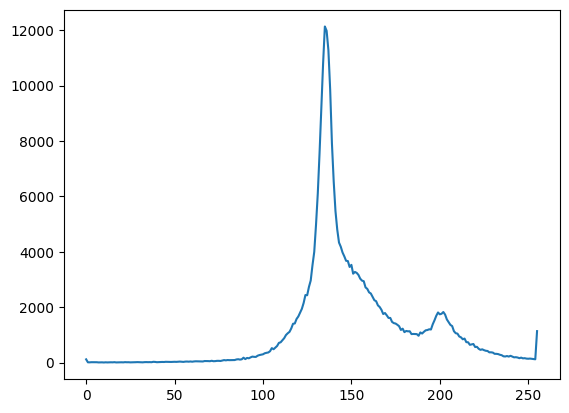

In [5]:
hist,bins = np.histogram(a.ravel(),256,[0,256])
plt.plot(hist)

In [6]:
th2 = mm.threshold(a)
plt.figure(figsize=(10, 10))
mm.show(th2)

In [7]:
anidro = (mm.areaopen(th2, 45)>0).astype('uint8')

plt.figure(figsize=(10, 10))
mm.show(img,mm.subm(anidro,mm.ero(anidro,mm.sebox(0))))

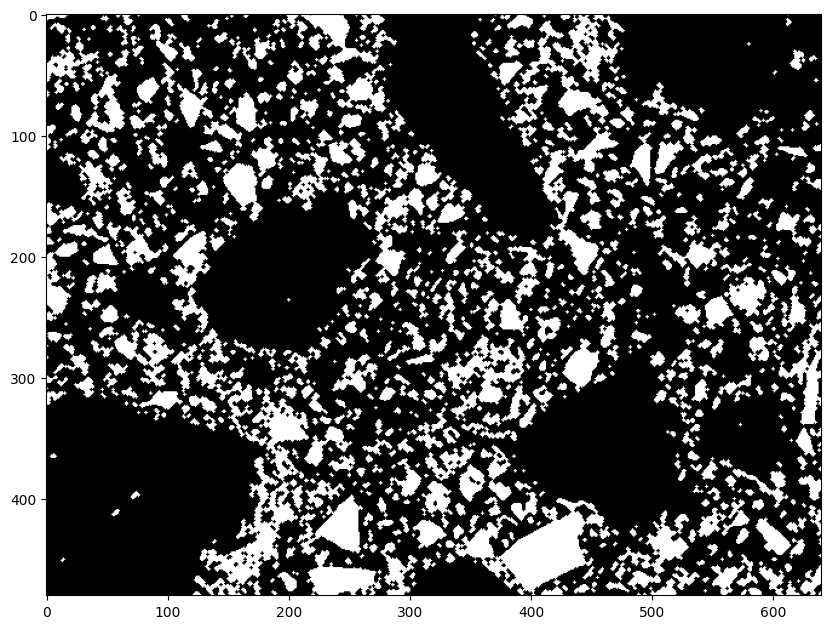

In [8]:
c = mm.asf(th2,'coc',mm.sedisk(3),1)
plt.figure(figsize=(10, 10))
mm.show(c)

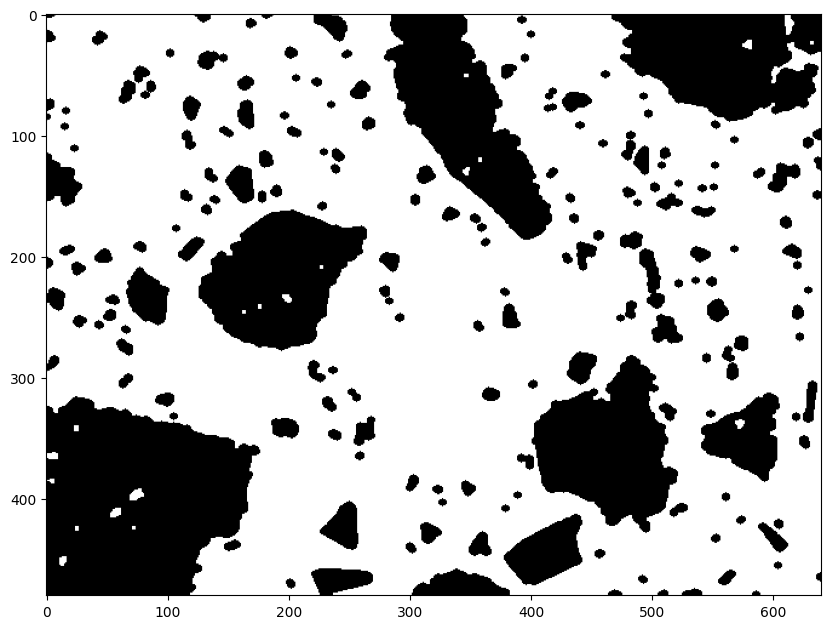

In [9]:
g=mm.gradm(th2)
h=mm.close(g,mm.sedisk(7))
plt.figure(figsize=(10, 10))
mm.show(h)

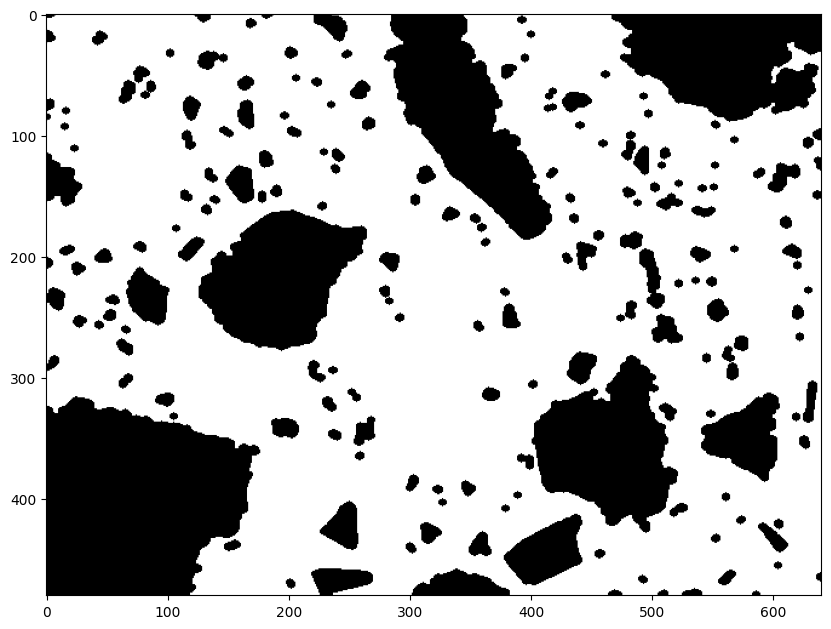

In [10]:
i=(mm.areaopen(h, 100)>0).astype('uint8')
plt.figure(figsize=(10, 10))
mm.show(i)

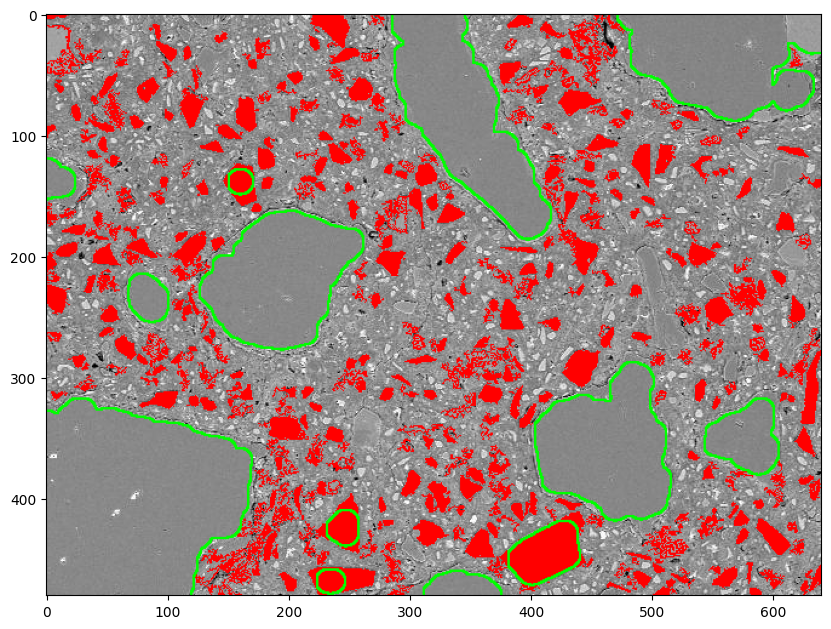

In [11]:
j=mm.neg(mm.close(i,mm.sedisk(20)))
plt.figure(figsize=(10, 10))
mm.show(img,anidro,mm.gradm(j))

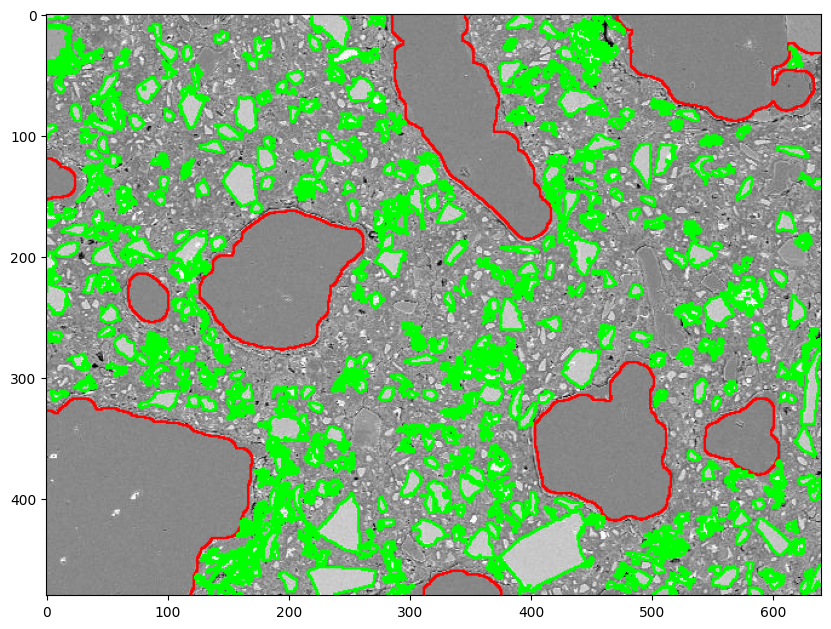

In [12]:
h = mm.infrec(j,cv2.bitwise_and(anidro,j))
i = mm.subm(j,h)
plt.figure(figsize=(10, 10))
mm.show(img,mm.gradm(i),mm.gradm(anidro))